In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  metrics
from sklearn.cluster import KMeans
import sklearn.cluster as clus

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
x = data.iloc[:,[3,4]]

In [22]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [23]:
K = range(1,12)
wcss = []
for k in K:
    kmeans = clus.KMeans(n_clusters=k,init='k-means++')
    kmeans = kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [24]:
centers = pd.DataFrame({'clusters':K,'Wcss':wcss})
centers

,clusters,Wcss
0,1,269981.280000
1,2,182440.307630
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37233.814511
6,7,30241.343618
7,8,24995.969781
8,9,22143.222101
9,10,20221.078162


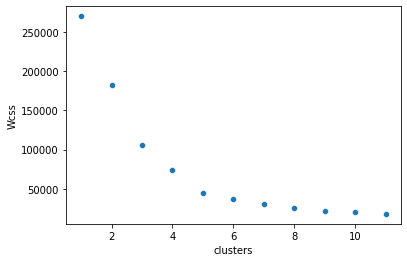

In [25]:
sns.scatterplot(x='clusters',y='Wcss',data=centers,markers="+")

**silhouette method**

In [26]:
for i in range(3,15):
  labels = KMeans(n_clusters=k,init='k-means++',random_state=200).fit(x).labels_
  print("silhouette score for k(clusters) = " +str(i)+ "    is   >>>   " 
  +str(metrics.silhouette_score(x,labels ,metric='euclidean',sample_size=1000,random_state=200)))

silhouette score for k(clusters) = 3    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 4    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 5    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 6    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 7    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 8    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 9    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 10    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 11    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 12    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 13    is   >>>   0.4506640486267676
silhouette score for k(clusters) = 14    is   >>>   0.4506640486267676


In [27]:
kmeans = KMeans(n_clusters=5,init='k-means++')

In [32]:
kmeans = kmeans.fit(x)

In [34]:
data['clusters']=kmeans.labels_

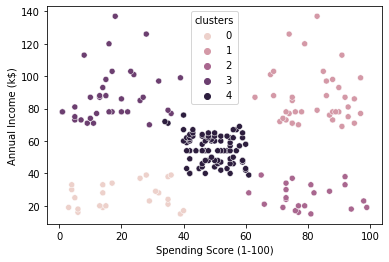

In [36]:
sns.scatterplot(x='Spending Score (1-100)',y='Annual Income (k$)',hue='clusters',data=data)